In [1]:
import re
import pandas as pd
import numpy as np

# it's using a dictionnary of 5000 words to find which words
# are the most popular in 1980 and 2022 and compute increase
liste_mots_reduced = pd.read_csv('common_words.txt', header=None, lineterminator=',')
liste_mots_reduced.iloc[5752] = "zones"
df = pd.read_json('CGI_r.json')
content_1980_reduced = df.loc[df.year == 1980].content
content_2022_reduced = df.loc[df.year == 2022].content
results_reduced = []
for mot in liste_mots_reduced[0]:
  word_count_1980_reduced = 0
  word_count_2022_reduced = 0
  for article in content_1980_reduced:
    word_count_1980_reduced += len(re.findall(mot, article, re.IGNORECASE))
  for article in content_2022_reduced:
    word_count_2022_reduced += len(re.findall(mot, article, re.IGNORECASE))
    # I added + 1 because sometimes it was 0 in 1980
  results_reduced.append([mot, word_count_1980_reduced, word_count_2022_reduced, 
  (word_count_2022_reduced-word_count_1980_reduced)/(word_count_1980_reduced + 1)])
df_words_reduced = pd.DataFrame(results_reduced)
df_words_reduced

,0,1,2,3
0,abandon,18,44,1.368421
1,abandonné,12,4,-0.615385
2,abattage,28,29,0.034483
3,abattu,11,9,-0.166667
4,abonnement,22,30,0.347826
...,...,...,...,...
5748,yens,47,190,2.979167
5749,zéro,4,25,4.200000
5750,zinc,15,14,-0.062500
5751,zone,61,422,5.822581


In [ ]:
# to save because it's quite long to do
df_words_reduced.to_csv("5000words.csv")

In [10]:
df_words_reduced.columns = ['mots', '1980', '2022', 'augmentation']
df_words_reduced.set_index('mots', inplace=True)
df_words_reduced.sort_values(by='augmentation', ascending=False).head(50)

ValueError: Length mismatch: Expected axis has 3 elements, new values have 4 elements

In [30]:
df_words_reduced[df_words_reduced['1980'] > 50].sort_values(by='augmentation', ascending=True).head(50)

,1980,2022,augmentation
mots,,,
huile,124,8,-0.928000
raisin,68,6,-0.898551
spiritueux,61,9,-0.838710
marchands,90,17,-0.802198
timbré,52,10,-0.792453
gros,139,35,-0.742857
cote,105,35,-0.660377
voiture,82,28,-0.650602
campagne,94,36,-0.610526


<AxesSubplot:title={'center':"disparition 'timbre'"}>

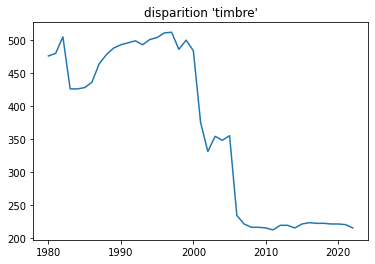

In [31]:
# to plot for a specified word on all years
results_ = []
for mot in ['timbre']:
  for year in range(1980, 2023):
    word_count_year = 0
    for article in df.loc[df.year == year].content:
      word_count_year += len(re.findall(mot, article, re.IGNORECASE))
    results_.append(word_count_year)
results_
pd.Series(results_, index=range(1980, 2023)).plot(title="disparition 'timbre'")

In [4]:
# to get info on a specific word like "décret"
df_words_reduced.loc["décret"]

1980            708.000000
2022            979.000000
augmentation      0.382228
Name: décret, dtype: float64